# House Price Prediction with Linear Regression

## 1. Data Loading and Preparation

We will load the training data and select the features of interest: `GrLivArea`, `BedroomAbvGr`, `FullBath`, and the target `SalePrice`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'c:/Users/rishi/OneDrive/Desktop/skillcraft/train (1).csv'
df = pd.read_csv(file_path)

# Select relevant columns
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
df_subset = df[features]

# Display first few rows
df_subset.head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


## 2. Exploratory Data Analysis (EDA)

Let's visualize the relationships between the features and the target variable.

GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64
         GrLivArea  BedroomAbvGr     FullBath      SalePrice
count  1460.000000   1460.000000  1460.000000    1460.000000
mean   1515.463699      2.866438     1.565068  180921.195890
std     525.480383      0.815778     0.550916   79442.502883
min     334.000000      0.000000     0.000000   34900.000000
25%    1129.500000      2.000000     1.000000  129975.000000
50%    1464.000000      3.000000     2.000000  163000.000000
75%    1776.750000      3.000000     2.000000  214000.000000
max    5642.000000      8.000000     3.000000  755000.000000


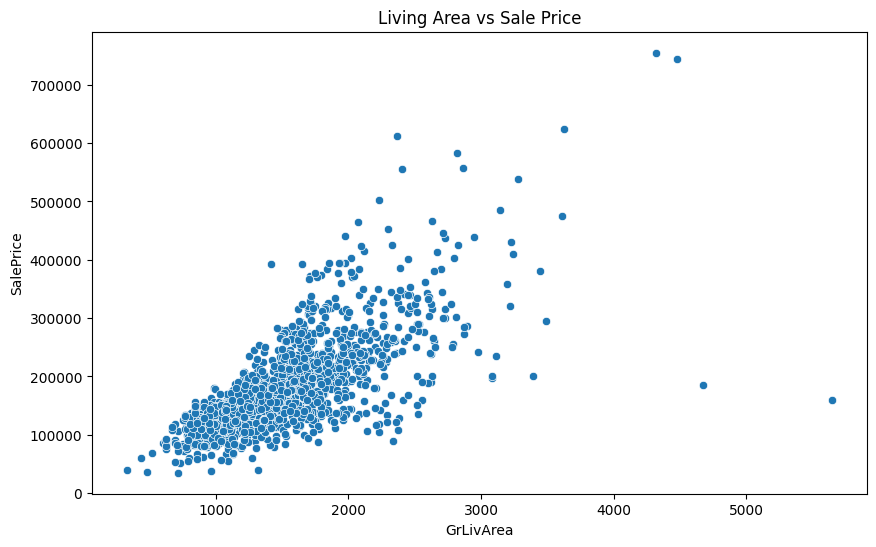

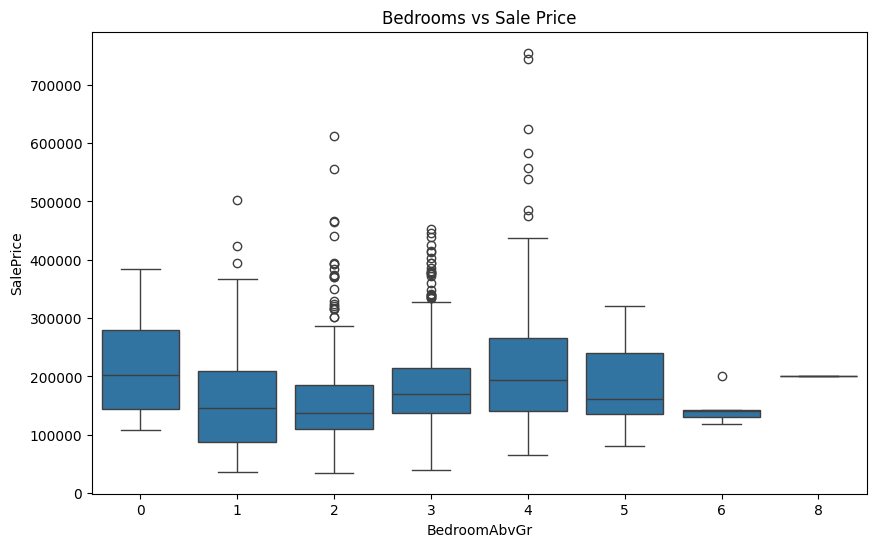

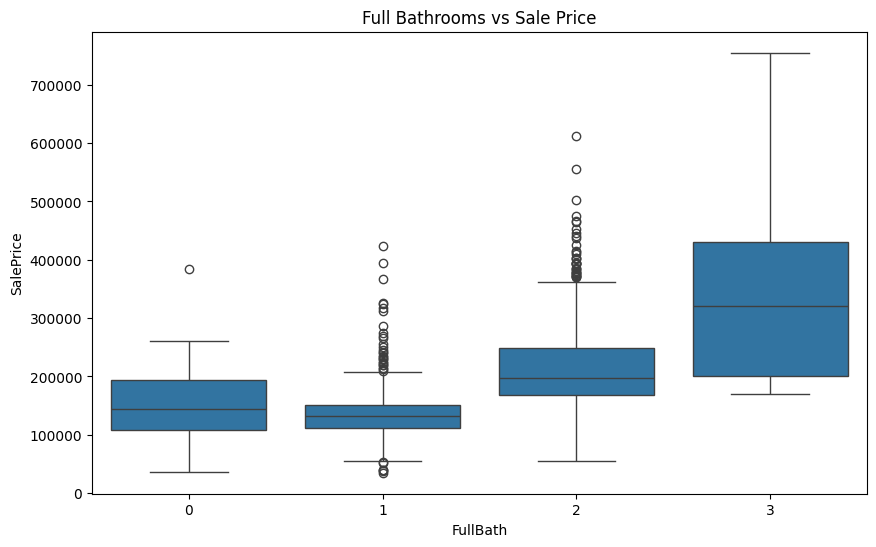

In [2]:
# Check for missing values
print(df_subset.isnull().sum())

# Summary statistics
print(df_subset.describe())

# Scatter plot for GrLivArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_subset)
plt.title('Living Area vs Sale Price')
plt.show()

# Box plot for BedroomAbvGr vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df_subset)
plt.title('Bedrooms vs Sale Price')
plt.show()

# Box plot for FullBath vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='FullBath', y='SalePrice', data=df_subset)
plt.title('Full Bathrooms vs Sale Price')
plt.show()

### Advanced Visualizations

We will add a Correlation Heatmap and Pair Plots to better understand the data structure.

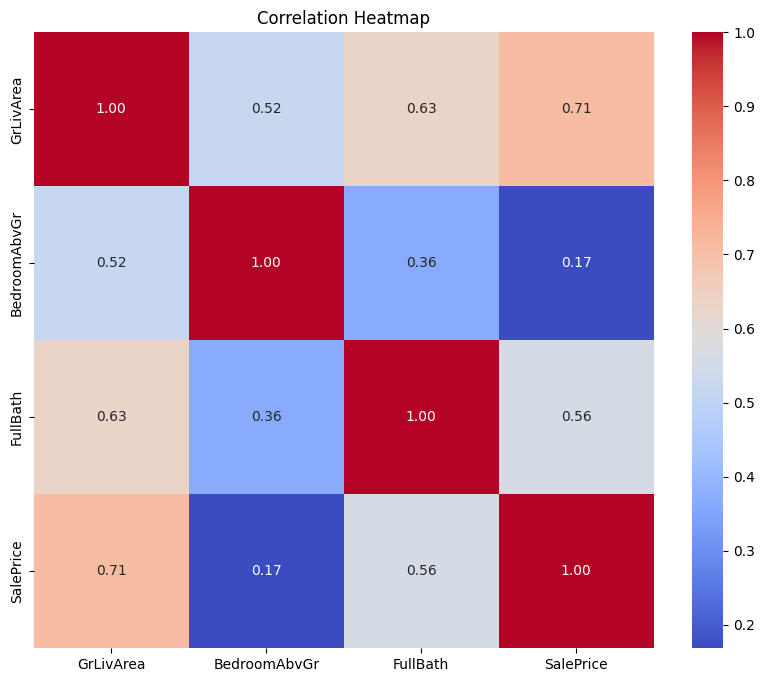

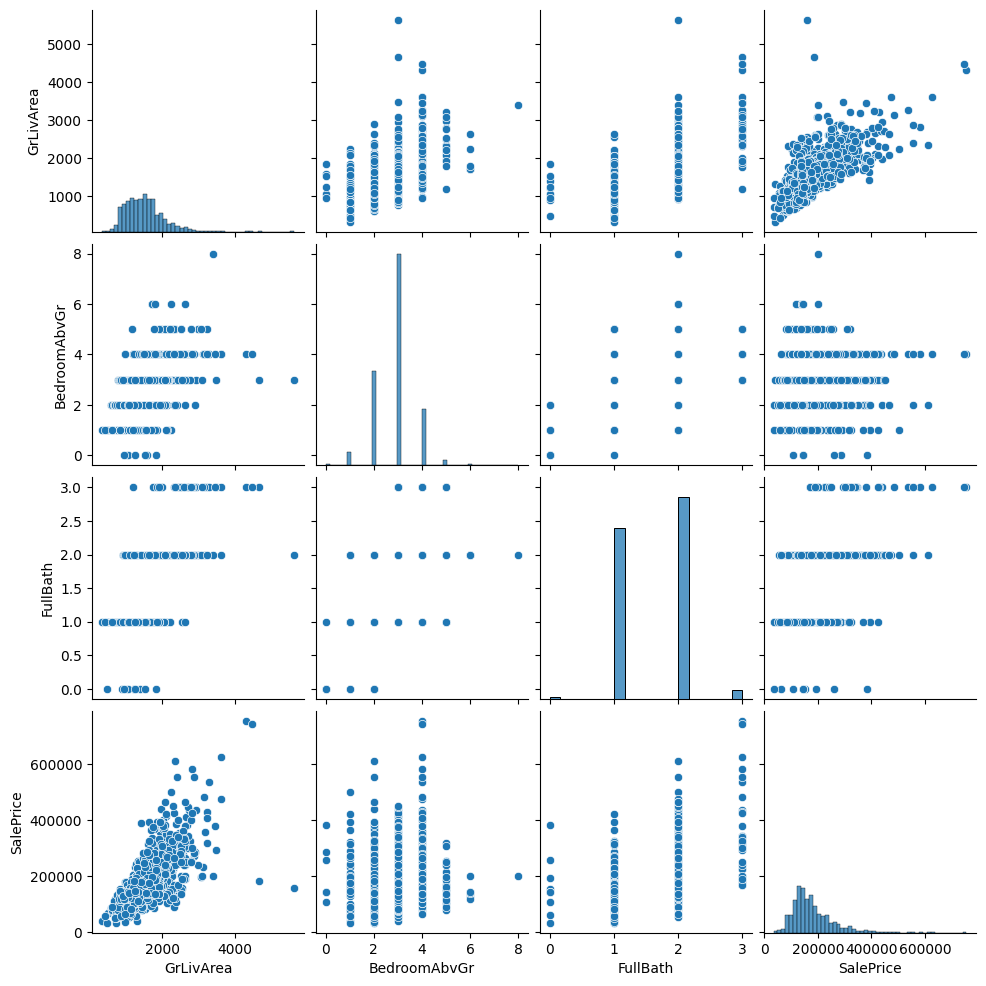

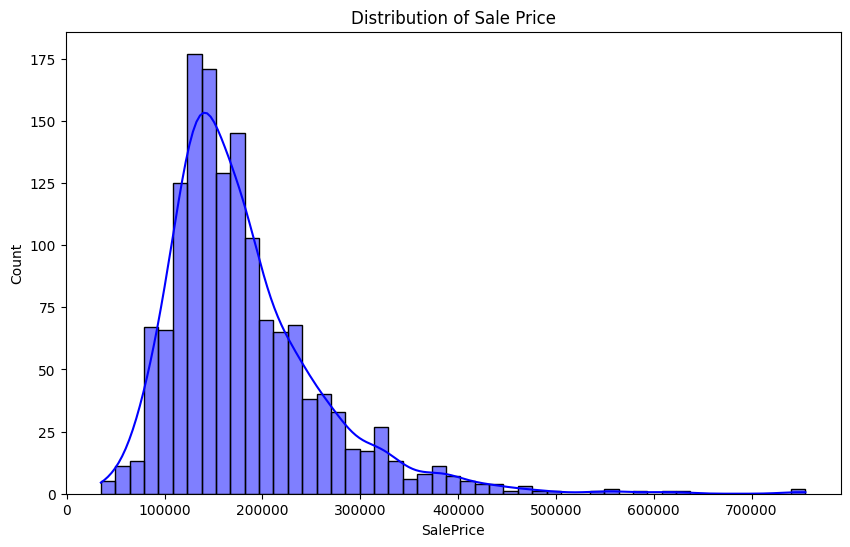

In [3]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot
sns.pairplot(df_subset)
plt.show()

# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.show()

## 3. Data Preprocessing

We will split the data into training and validation sets. Since there are no missing values in our selected columns, no imputation is needed.

In [4]:
from sklearn.model_selection import train_test_split

X = df_subset[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df_subset['SalePrice']

# Split the data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (1168, 3)
Validation set shape: (292, 3)


## 4. Modeling: Linear Regression

We will train a Linear Regression model.

In [5]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 52261.748626944594
Coefficients: [   104.02630701 -26655.16535734  30014.32410896]


## 5. Model Evaluation

We will evaluate the model using MSE, RMSE, and R-squared score.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 2806426667.25
Root Mean Squared Error: 52975.72
R-squared Score: 0.6341


## 6. Visualization of Results

Let's visualize the actual vs. predicted prices.

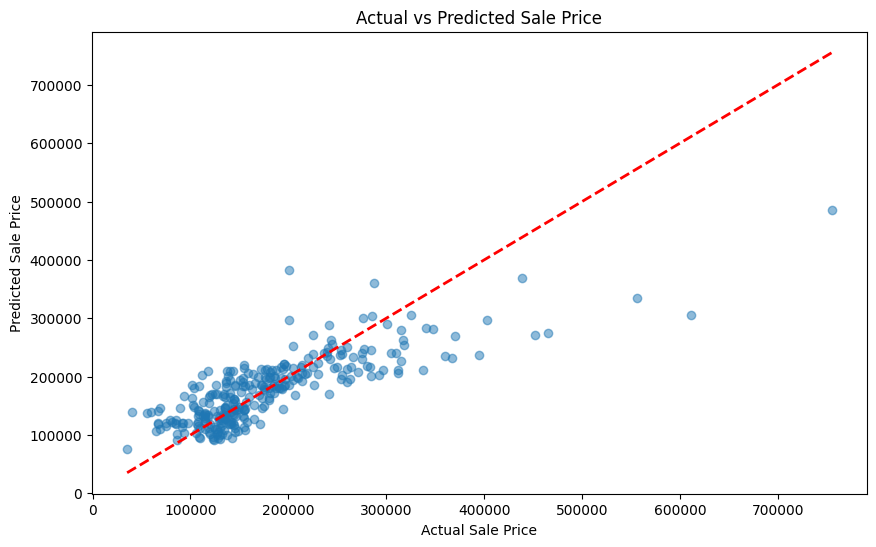

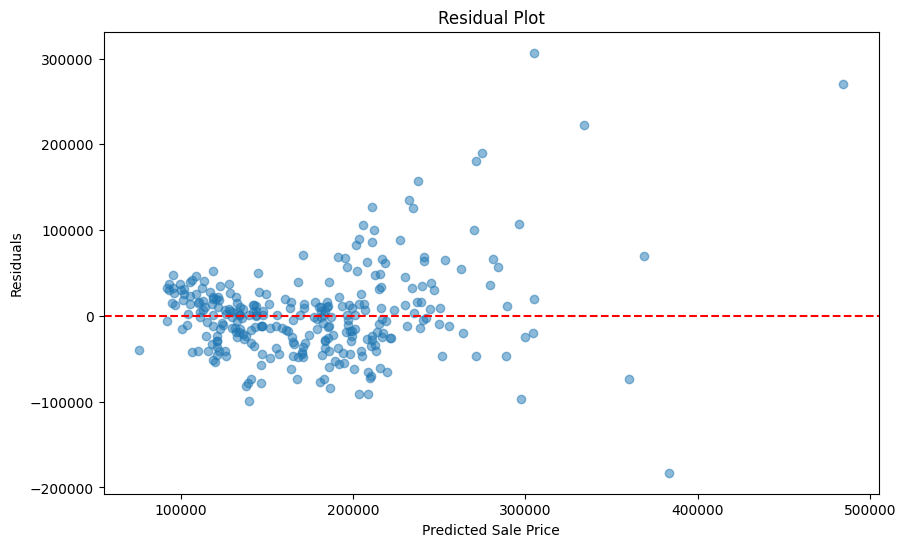

In [7]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2) # Diagonal line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Residual plot
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()